In [1]:
! pip3 install --upgrade --quiet google-cloud-aiplatform

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install xarray netCDF4 cartopy matplotlib


# ERA5

## Load ERA5 2021 June & July

Copying gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc...
/ [1 files][225.5 KiB/225.5 KiB]                                                
Operation completed over 1 objects/225.5 KiB.                                    
June 29 times: ['2021-06-29T00:00:00.000000000' '2021-06-29T06:00:00.000000000'
 '2021-06-29T12:00:00.000000000' '2021-06-29T18:00:00.000000000']


/var/tmp/ipykernel_6911/3629318266.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.95]); plt.show()


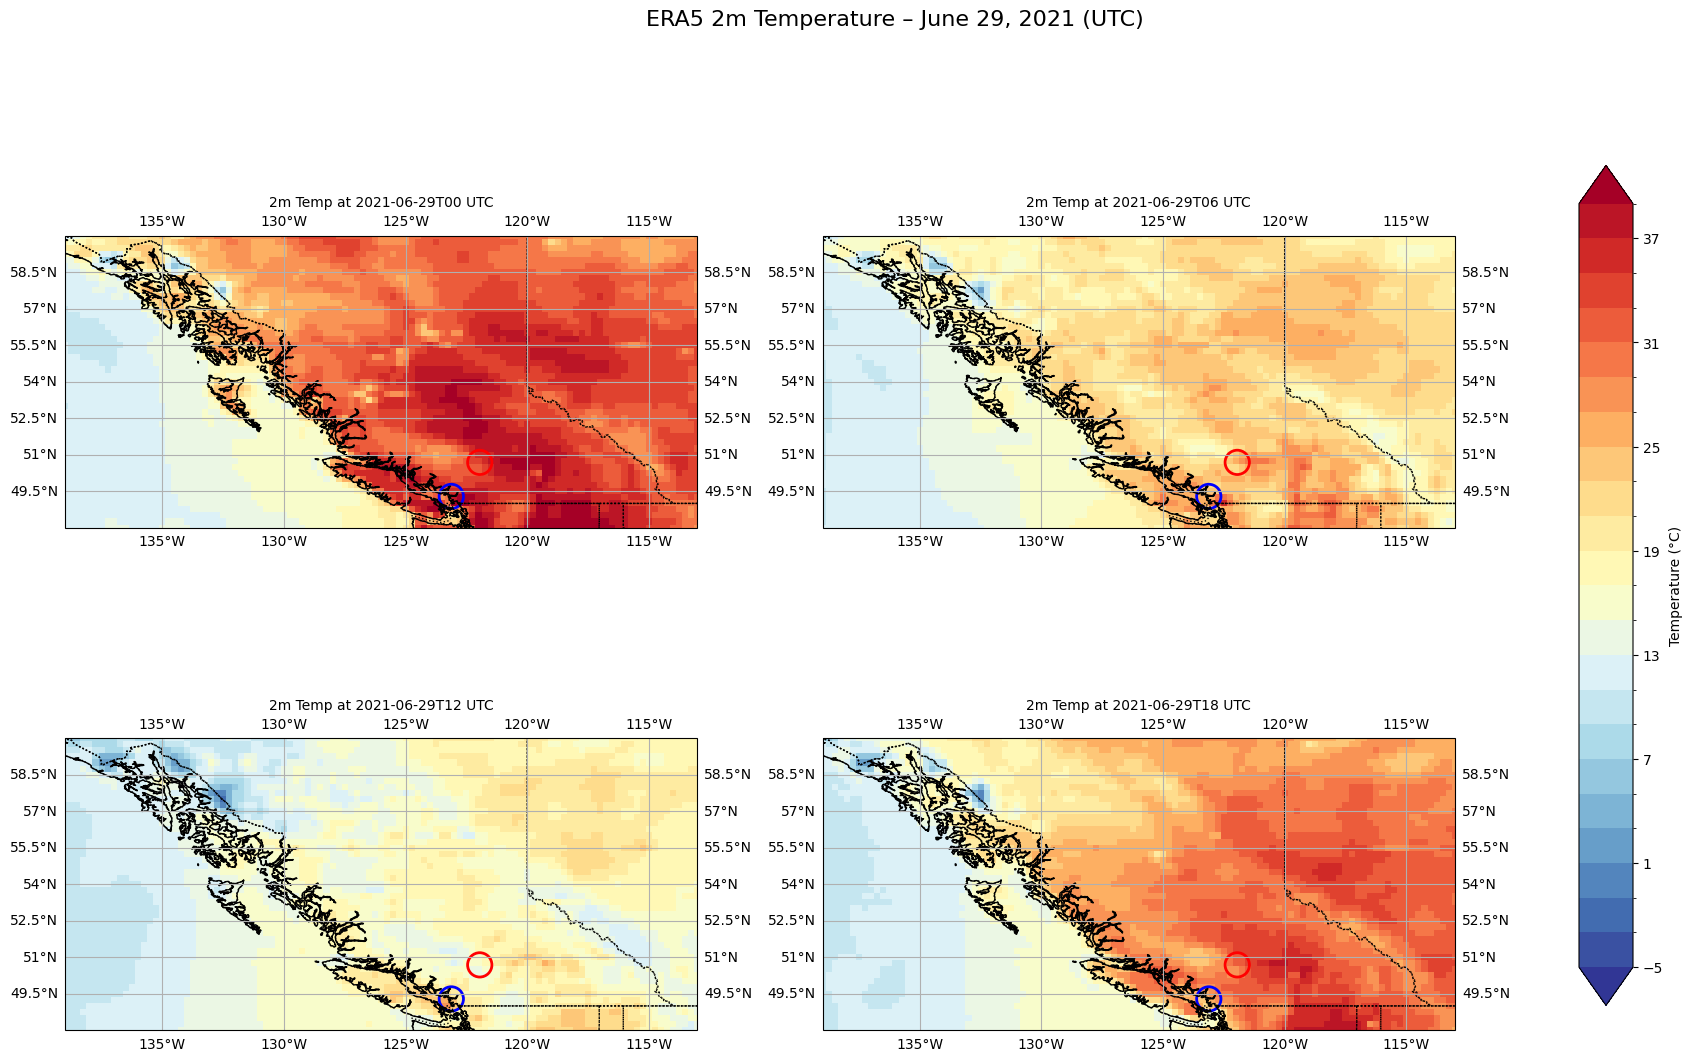


Summary Statistics for Selected Locations (June 29, 2021):
                     Location  Mean (°C)   Min (°C)   Max (°C)  Std (°C)
0  Vancouver (49.28, -123.12)  28.373688  23.166412  37.202789  5.283280
1     Lytton (50.68, -121.95)  26.916168  15.650787  34.831696  7.294788


In [4]:
import xarray as xr, matplotlib.pyplot as plt, cartopy.crs as ccrs, cartopy.feature as cfeature, numpy as np, pandas as pd
from matplotlib.patches import Circle

# Download and load ERA5 June data; select June 29 (6-hourly)
!gsutil cp gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc /tmp/era5_june.nc
ds = xr.open_dataset('/tmp/era5_june.nc', engine='netcdf4').sel(valid_time=slice("2021-06-29T00:00:00", "2021-06-29T23:59:59"))
print("June 29 times:", ds.valid_time.values)

# Define location coordinates
locs = {'Vancouver': (49.28, -123.12), 'Lytton': (50.68, -121.95)}

# Plot each time slice in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten(); levels = np.arange(-5, 41, 2)
for ax, t in zip(axs, ds.valid_time.values):
    t2m = ds.t2m.sel(valid_time=t, method='nearest') - 273.15
    im = t2m.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both', add_colorbar=False)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    ax.set_extent([-139, -113, 48, 60], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)
    ax.set_title(f"2m Temp at {np.datetime_as_string(t, unit='h')} UTC", fontsize=10)
    for loc, (lat, lon) in locs.items():
        ax.add_patch(Circle((lon, lat), 0.5, edgecolor=('blue' if loc=='Vancouver' else 'red'),
                             facecolor='none', linewidth=2, transform=ccrs.PlateCarree()))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Temperature (°C)')
plt.suptitle('ERA5 2m Temperature – June 29, 2021 (UTC)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95]); plt.show()

# Compute summary stats for each location
stats = [{ 'Location': f"{loc} ({lat}, {lon})",
           'Mean (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).mean()),
           'Min (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).min()),
           'Max (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).max()),
           'Std (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).std())
         } for loc, (lat, lon) in locs.items()]
df = pd.DataFrame(stats)
print("\nSummary Statistics for Selected Locations (June 29, 2021):")
print(df)

## Plot BC maps for June 29

Copying gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc...
/ [1 files][225.5 KiB/225.5 KiB]                                                
Operation completed over 1 objects/225.5 KiB.                                    
June 29 times: ['2021-06-29T00:00:00.000000000' '2021-06-29T06:00:00.000000000'
 '2021-06-29T12:00:00.000000000' '2021-06-29T18:00:00.000000000']


/var/tmp/ipykernel_6911/3629318266.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.95]); plt.show()


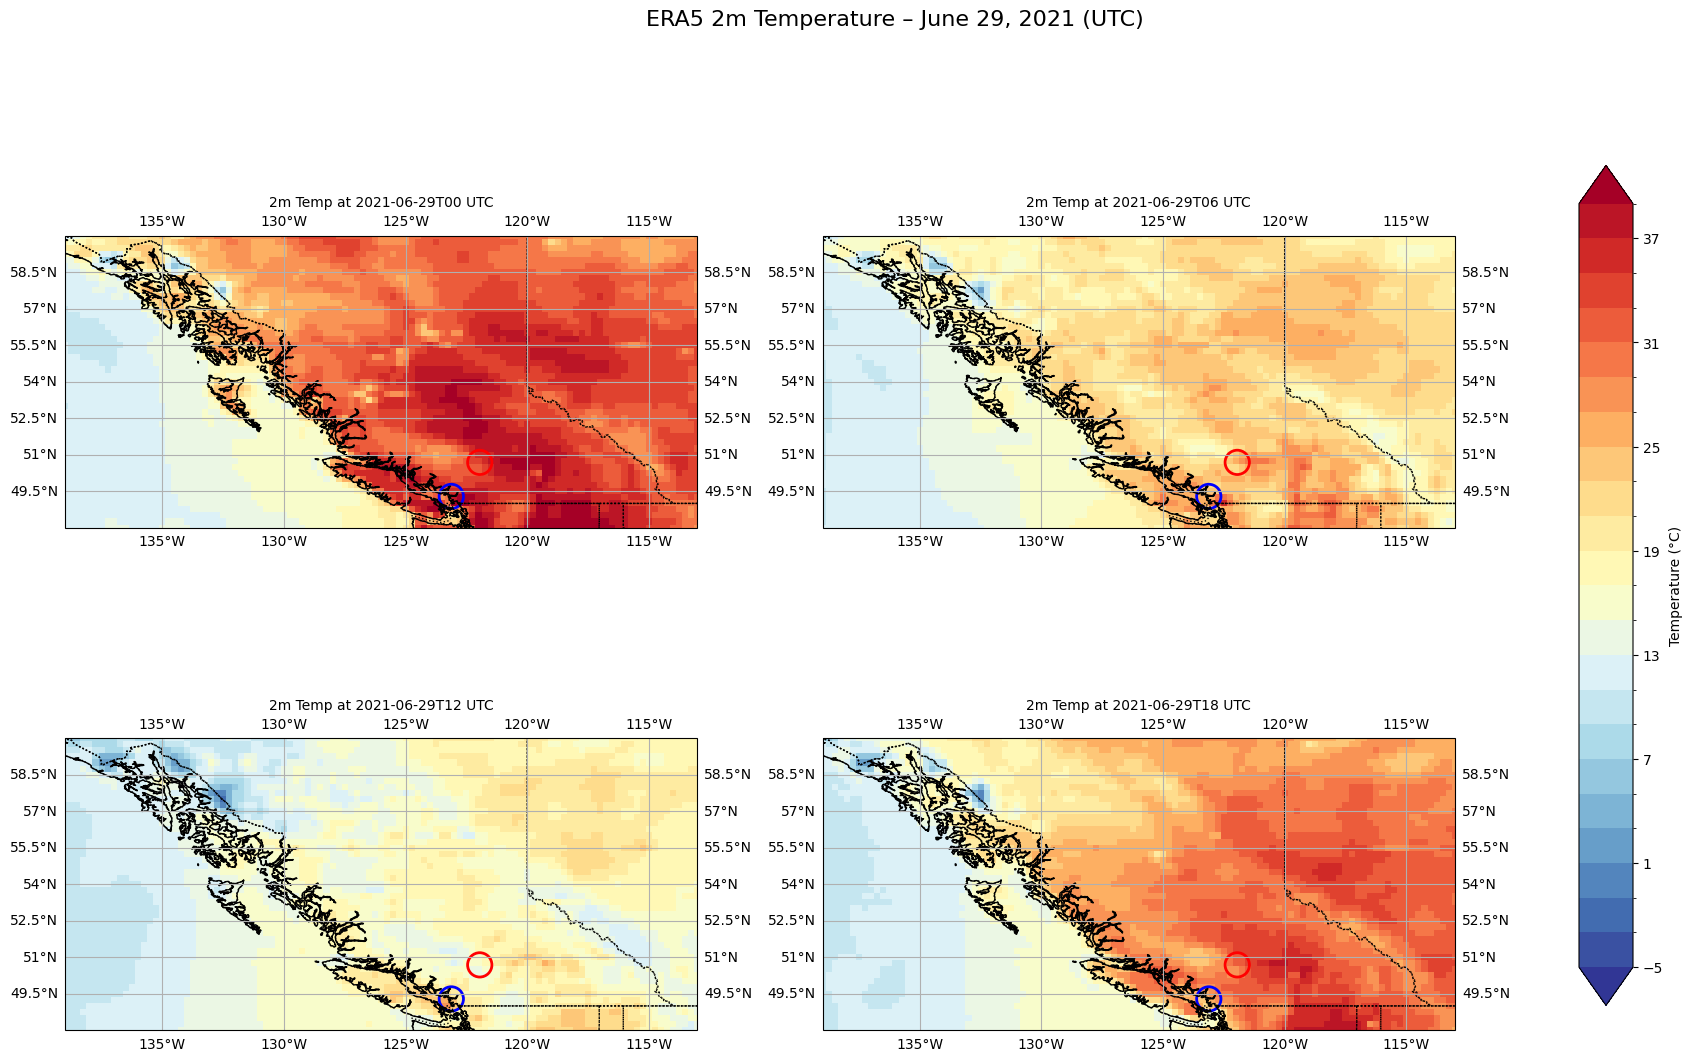


Summary Statistics for Selected Locations (June 29, 2021):
                     Location  Mean (°C)   Min (°C)   Max (°C)  Std (°C)
0  Vancouver (49.28, -123.12)  28.373688  23.166412  37.202789  5.283280
1     Lytton (50.68, -121.95)  26.916168  15.650787  34.831696  7.294788


In [5]:
import xarray as xr, matplotlib.pyplot as plt, cartopy.crs as ccrs, cartopy.feature as cfeature, numpy as np, pandas as pd
from matplotlib.patches import Circle

# Download and load ERA5 June data; select June 29 (6-hourly)
!gsutil cp gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc /tmp/era5_june.nc
ds = xr.open_dataset('/tmp/era5_june.nc', engine='netcdf4').sel(valid_time=slice("2021-06-29T00:00:00", "2021-06-29T23:59:59"))
print("June 29 times:", ds.valid_time.values)

# Define location coordinates
locs = {'Vancouver': (49.28, -123.12), 'Lytton': (50.68, -121.95)}

# Plot each time slice in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten(); levels = np.arange(-5, 41, 2)
for ax, t in zip(axs, ds.valid_time.values):
    t2m = ds.t2m.sel(valid_time=t, method='nearest') - 273.15
    im = t2m.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both', add_colorbar=False)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    ax.set_extent([-139, -113, 48, 60], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)
    ax.set_title(f"2m Temp at {np.datetime_as_string(t, unit='h')} UTC", fontsize=10)
    for loc, (lat, lon) in locs.items():
        ax.add_patch(Circle((lon, lat), 0.5, edgecolor=('blue' if loc=='Vancouver' else 'red'),
                             facecolor='none', linewidth=2, transform=ccrs.PlateCarree()))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Temperature (°C)')
plt.suptitle('ERA5 2m Temperature – June 29, 2021 (UTC)', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95]); plt.show()

# Compute summary stats for each location
stats = [{ 'Location': f"{loc} ({lat}, {lon})",
           'Mean (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).mean()),
           'Min (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).min()),
           'Max (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).max()),
           'Std (°C)': float((ds.t2m.sel(latitude=lat, longitude=lon, method='nearest') - 273.15).std())
         } for loc, (lat, lon) in locs.items()]
df = pd.DataFrame(stats)
print("\nSummary Statistics for Selected Locations (June 29, 2021):")
print(df)

## Time-series plot

Copying gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc...
/ [1 files][225.5 KiB/225.5 KiB]                                                
Operation completed over 1 objects/225.5 KiB.                                    
Copying gs://gencast/ERA5_2021_07/data_stream-oper_stepType-instant.nc...
/ [1 files][453.6 KiB/453.6 KiB]                                                
Operation completed over 1 objects/453.6 KiB.                                    


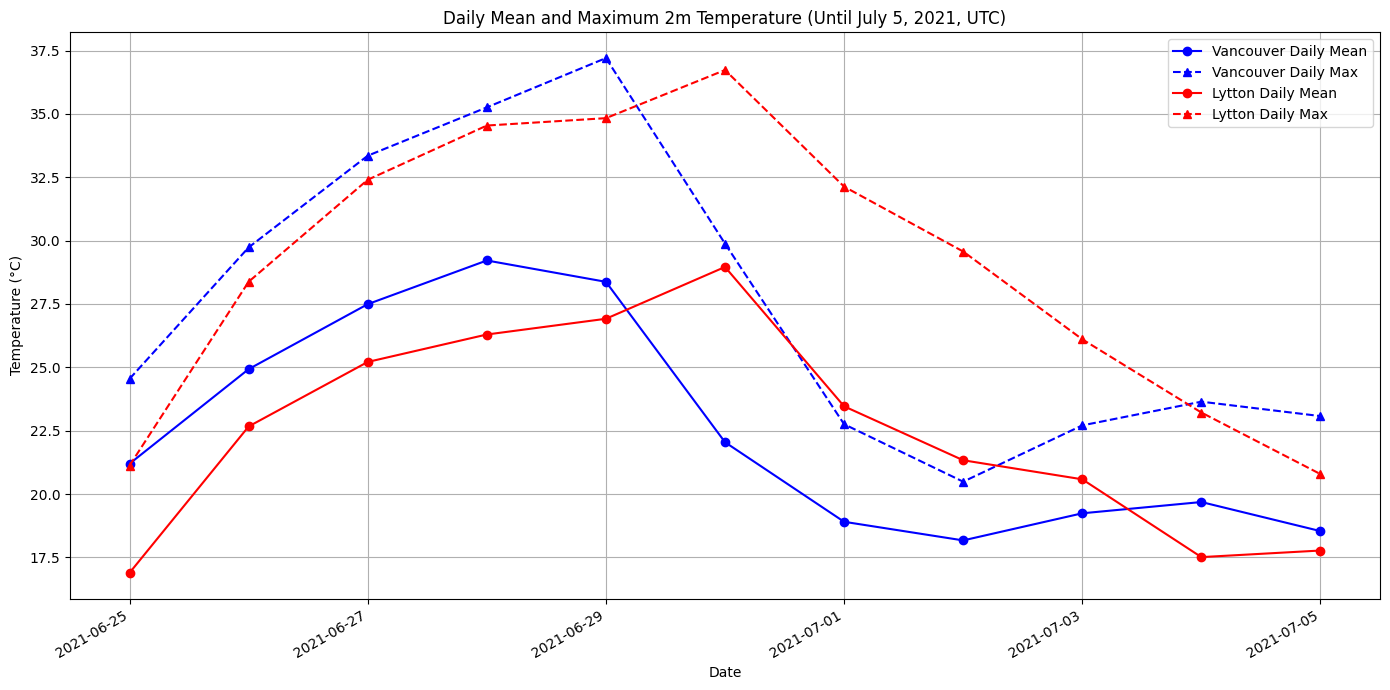

In [6]:
import xarray as xr, matplotlib.pyplot as plt, numpy as np, pandas as pd

# Download ERA5 June and July data
for src, dst in [
    ('gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc', '/tmp/era5_june.nc'),
    ('gs://gencast/ERA5_2021_07/data_stream-oper_stepType-instant.nc', '/tmp/era5_july.nc')
]:
    !gsutil cp {src} {dst}

# Load and merge datasets
ds = xr.concat([
    xr.open_dataset('/tmp/era5_june.nc', engine='netcdf4'),
    xr.open_dataset('/tmp/era5_july.nc', engine='netcdf4')
], dim="valid_time")

# Location coordinates
locs = {'Vancouver': (49.28, -123.12), 'Lytton': (50.68, -121.95)}
cutoff = pd.to_datetime("2021-07-05")

# Extract 2m temperature, convert to °C, and compute daily stats (filtered to July 5)
daily_stats = {}
for name, (lat, lon) in locs.items():
    da = ds['t2m'].sel(latitude=lat, longitude=lon, method='nearest') - 273.15
    series = pd.Series(da.values, index=pd.to_datetime(da.valid_time.values))
    daily = series.groupby(series.index.date)
    daily_stats[name] = {
        'mean': daily.mean()[lambda d: pd.to_datetime(d.index) <= cutoff],
        'max':  daily.max()[lambda d: pd.to_datetime(d.index) <= cutoff]
    }

# Plot
plt.figure(figsize=(14, 7))
styles = {'Vancouver': 'blue', 'Lytton': 'red'}
markers = {'mean': 'o', 'max': '^'}
for name, stats in daily_stats.items():
    for stat, style in stats.items():
        plt.plot(style.index, style, label=f"{name} Daily {stat.title()}",
                 color=styles[name], marker=markers[stat], linestyle='--' if stat == 'max' else '-')

plt.title('Daily Mean and Maximum 2m Temperature (Until July 5, 2021, UTC)')
plt.xlabel('Date'); plt.ylabel('Temperature (°C)')
plt.legend(); plt.grid(True)
plt.gcf().autofmt_xdate(); plt.tight_layout()
plt.show()

ds.close()


In [7]:
ds.head()

<xarray.Dataset> Size: 708B
Dimensions:     (valid_time: 5, latitude: 5, longitude: 5)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 40B 2021-06-25 ... 2021-06-26
  * latitude    (latitude) float64 40B 60.0 59.75 59.5 59.25 59.0
  * longitude   (longitude) float64 40B -139.0 -138.8 -138.5 -138.2 -138.0
    expver      (valid_time) <U4 80B '0001' '0001' '0001' '0001' '0001'
Data variables:
    t2m         (valid_time, latitude, longitude) float32 500B 280.7 ... 284.8
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-26T16:10 GRIB to CDM+CF via cfgrib-0.9.1...

# Get Queried WeatherNext dataset

In [8]:
!pip install -q dask gcsfs && pip install -q --upgrade --force-reinstall "pyarrow>=14.0.1"

## Load averaged CSV results from BigQuery

In [9]:
import subprocess, pandas as pd, geopandas as gpd
from shapely.wkt import loads as wkt_loads

# ------------------ Config ------------------
load_all = True
cols = [
    "init_time",
    "forecast_time",
    "geography_polygon_text",
    "geography_text",
    
    "avg_total_precipitation_12hr", "sd_total_precipitation_12hr",
    "avg_100m_u_component_of_wind", "sd_100m_u_component_of_wind",
    "avg_100m_v_component_of_wind", "sd_100m_v_component_of_wind",
    "avg_10m_u_component_of_wind", "sd_10m_u_component_of_wind",
    "avg_10m_v_component_of_wind", "sd_10m_v_component_of_wind",
    "avg_2m_temperature", "sd_2m_temperature",
    "avg_mean_sea_level_pressure", "sd_mean_sea_level_pressure",
    "avg_sea_surface_temperature", "sd_sea_surface_temperature"
]

# ------------------ Load files ------------------
files = subprocess.check_output([
    'gsutil', 'ls',
    'gs://gencast/weathernext/weathernext_bc_heatwave_2021_avg_sd_14days/*.csv'
]).decode().strip().split('\n')
if not load_all:
    files = files[:2]
print(f"Loading {len(files)} files...")

df = pd.concat([pd.read_csv(f, names=cols, header=None) for f in files], ignore_index=True)

# ------------------ Geo & Time Prep ------------------
df['init_time'] = pd.to_datetime(df['init_time'], errors='coerce')
df['forecast_time'] = pd.to_datetime(df['forecast_time'], errors='coerce')
df['geometry'] = df['geography_polygon_text'].apply(wkt_loads)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

# ------------------ Quick Check ------------------
print("\nGeoDataFrame preview:\n", gdf.head())
print("\nForecast time range:", gdf['forecast_time'].min(), "to", gdf['forecast_time'].max())

Loading 1 files...

GeoDataFrame preview:
                   init_time             forecast_time  \
0 2021-06-11 00:00:00+00:00 2021-06-25 00:00:00+00:00   
1 2021-06-11 00:00:00+00:00 2021-06-25 00:00:00+00:00   
2 2021-06-11 00:00:00+00:00 2021-06-25 00:00:00+00:00   
3 2021-06-11 00:00:00+00:00 2021-06-25 00:00:00+00:00   
4 2021-06-11 00:00:00+00:00 2021-06-25 00:00:00+00:00   

                              geography_polygon_text        geography_text  \
0  POLYGON((-115.375 48.875, -115.375 49.125, -11...      POINT(-115.5 49)   
1  POLYGON((-137.125 52.625, -137.125 52.875, -13...  POINT(-137.25 52.75)   
2  POLYGON((-122.875 52.125, -122.875 52.375, -12...     POINT(-123 52.25)   
3  POLYGON((-115.875 55.625, -115.875 55.875, -11...     POINT(-116 55.75)   
4  POLYGON((-128.625 59.875, -128.625 60.125, -12...     POINT(-128.75 60)   

   avg_total_precipitation_12hr  sd_total_precipitation_12hr  \
0                      0.001833                     0.003123   
1                

## Regrid

In [10]:
pip install affine

Note: you may need to restart the kernel to use updated packages.


ERA5 grid defined with affine transform:
| 0.25, 0.00,-139.00|
| 0.00,-0.25, 60.00|
| 0.00, 0.00, 1.00|
Unique forecast times selected: [Timestamp('2021-06-29 00:00:00+0000', tz='UTC'), Timestamp('2021-06-29 06:00:00+0000', tz='UTC'), Timestamp('2021-06-29 12:00:00+0000', tz='UTC'), Timestamp('2021-06-29 18:00:00+0000', tz='UTC')]

For forecast time 2021-06-29 00:00:00+00:00, number of records: 10242
Rasterized data stats for time 2021-06-29 00:00:00+00:00: min = 279.5167108154297, max = 301.31264038085936

For forecast time 2021-06-29 06:00:00+00:00, number of records: 10242
Rasterized data stats for time 2021-06-29 06:00:00+00:00: min = 278.4181701660156, max = 294.4391204833984

For forecast time 2021-06-29 12:00:00+00:00, number of records: 10242
Rasterized data stats for time 2021-06-29 12:00:00+00:00: min = 277.1464459228516, max = 291.1969268798828

For forecast time 2021-06-29 18:00:00+00:00, number of records: 10242
Rasterized data stats for time 2021-06-29 18:00:00+00:00: min

/var/tmp/ipykernel_6911/3321737608.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.95])


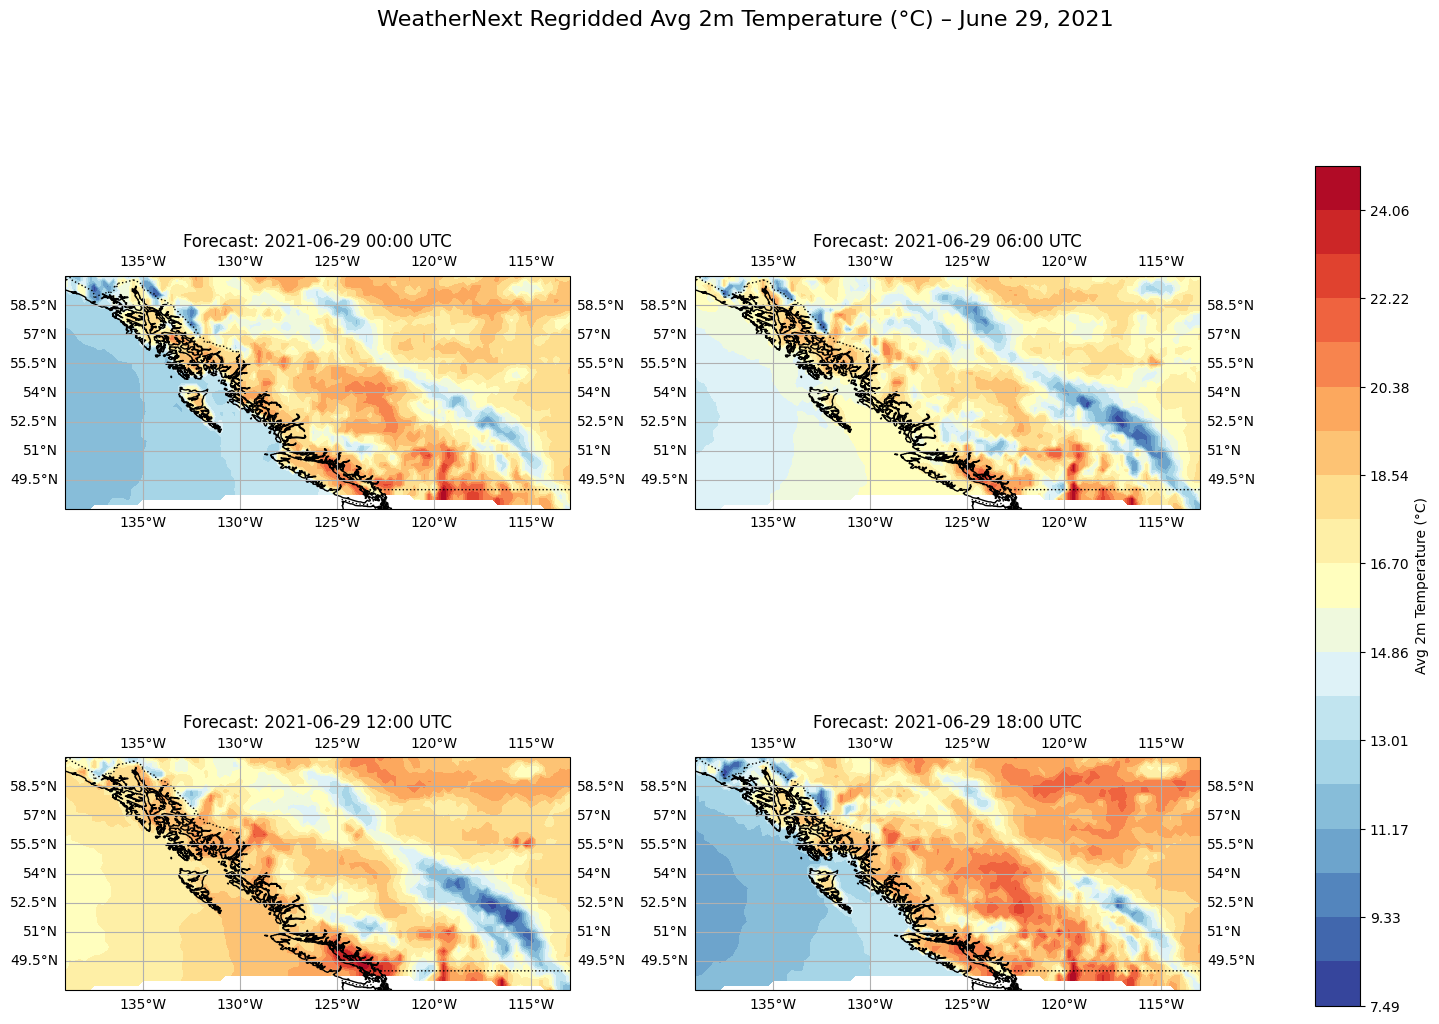

In [11]:
import xarray as xr
import geopandas as gpd
import numpy as np
import pandas as pd
import affine
import rasterio.features as features
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ===============================
# 1. Use Already Loaded ERA5 June 29 Data
# ===============================
# (Assume you already ran this code to load ERA5 June 29 data)
#
# !gsutil cp gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc /tmp/era5_june.nc
# ds = xr.open_dataset('/tmp/era5_june.nc', engine='netcdf4').sel(valid_time=slice("2021-06-29T00:00:00", "2021-06-29T23:59:59"))
#
# The dataset ds should have coordinates "latitude" and "longitude".
target_lat = ds['latitude'].values
target_lon = ds['longitude'].values

dx = target_lon[1] - target_lon[0]
dy = target_lat[1] - target_lat[0]
transform = affine.Affine(dx, 0.0, target_lon.min(),
                          0.0, -abs(dy), target_lat.max())

print("ERA5 grid defined with affine transform:")
print(transform)
# Expected output:
# | 0.25, 0.00, -139.00|
# | 0.00, -0.25, 60.00 |
# | 0.00, 0.00, 1.00   |

# ===============================
# 2. Prepare WeatherNext Data
# ===============================
# Ensure your WeatherNext GeoDataFrame (gdf) uses CRS EPSG:4326.
if gdf.crs is None or gdf.crs.to_string() != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# Filter the GeoDataFrame to forecast times on June 29, 2021.
selected_date = pd.Timestamp("2021-06-29").date()
gdf_june29 = gdf[gdf["forecast_time"].dt.date == selected_date]

# Choose the first 4 unique forecast times for illustration.
unique_times = sorted(gdf_june29["forecast_time"].unique())[:4]
print("Unique forecast times selected:", unique_times)
# Expected example output:
# [Timestamp('2021-06-29 00:00:00+0000', tz='UTC'),
#  Timestamp('2021-06-29 06:00:00+0000', tz='UTC'),
#  Timestamp('2021-06-29 12:00:00+0000', tz='UTC'),
#  Timestamp('2021-06-29 18:00:00+0000', tz='UTC')]

# ===============================
# 3. Function to Rasterize a Single Timestamp
# ===============================
def rasterize_timestamp(gdf_subset, target_lon, target_lat, transform, value_col):
    """
    Rasterizes WeatherNext polygon geometries for one forecast time.

    Parameters:
      gdf_subset: GeoDataFrame for one forecast time.
      target_lon: 1D numpy array of ERA5 grid longitudes.
      target_lat: 1D numpy array of ERA5 grid latitudes.
      transform: affine.Affine transform defining the ERA5 grid.
      value_col: Name of the column to rasterize (e.g., "avg_2m_temperature").

    Returns:
      A 2D numpy array (nlat x nlon) on the ERA5 grid.
    """
    # Create list of (geometry, value) tuples.
    shapes = [(geom, val) for geom, val in zip(gdf_subset.geometry, gdf_subset[value_col])]
    nlat, nlon = len(target_lat), len(target_lon)
    # Use MergeAlg.replace so that the cell value is directly overwritten.
    rasterized = features.rasterize(
        shapes=shapes,
        out_shape=(nlat, nlon),
        transform=transform,
        fill=np.nan,
        merge_alg=features.MergeAlg.replace
    )
    return rasterized

# ===============================
# 4. Loop Over the 4 Forecast Times and Regrid WeatherNext Data
# ===============================
regridded_list = []
for t in unique_times:
    # Filter records for time t.
    gdf_t = gdf_june29[gdf_june29["forecast_time"] == t]
    print(f"\nFor forecast time {t}, number of records: {len(gdf_t)}")
    # Rasterize the selected variable onto the ERA5 grid.
    raster = rasterize_timestamp(gdf_t, target_lon, target_lat, transform, "avg_2m_temperature")
    print(f"Rasterized data stats for time {t}: min = {np.nanmin(raster)}, max = {np.nanmax(raster)}")
    
    # Convert the rasterized array to an xarray DataArray.
    da = xr.DataArray(raster,
                      coords={"latitude": target_lat, "longitude": target_lon},
                      dims=["latitude", "longitude"])
    # Expand dimensions to add a time coordinate.
    da = da.expand_dims(time=[pd.to_datetime(t)])
    regridded_list.append(da)

weatherNext_da_june29 = xr.concat(regridded_list, dim="time")
print("\nFinal Regridded WeatherNext DataArray:")
print(weatherNext_da_june29)
# This should show a DataArray with dimensions (time: 4, latitude: 49, longitude: 105) with non-NaN values if geometries overlap the grid.

# ===============================
# 5. Plot the Regridded WeatherNext Maps with Temperature Conversion
# ===============================
fig, axs = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={"projection": ccrs.PlateCarree()})
axs = axs.flatten()

for i, ax in enumerate(axs):
    da_slice = weatherNext_da_june29.isel(time=i)
    # Convert temperature from Kelvin to Celsius for plotting.
    da_slice_celsius = da_slice - 273.15
    data_min = np.nanmin(da_slice_celsius.values)
    data_max = np.nanmax(da_slice_celsius.values)
    print(f"Time slice {i} stats (in °C): min = {data_min}, max = {data_max}")
    if np.isfinite(data_min) and np.isfinite(data_max):
        levels = np.linspace(data_min, data_max, 20)
    else:
        levels = [0, 1]
    im = ax.contourf(da_slice.longitude, da_slice.latitude, da_slice_celsius,
                     levels=levels, cmap="RdYlBu_r", transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.gridlines(draw_labels=True)
    # Since each slice's time coordinate is scalar, use .item() to extract its value.
    time_str = pd.to_datetime(da_slice.coords["time"].item()).strftime("%Y-%m-%d %H:%M UTC")
    ax.set_title(f"Forecast: {time_str}")
    ax.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                  crs=ccrs.PlateCarree())

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax, label="Avg 2m Temperature (°C)")
plt.suptitle("WeatherNext Regridded Avg 2m Temperature (°C) – June 29, 2021", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()


In [12]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


## Plot together

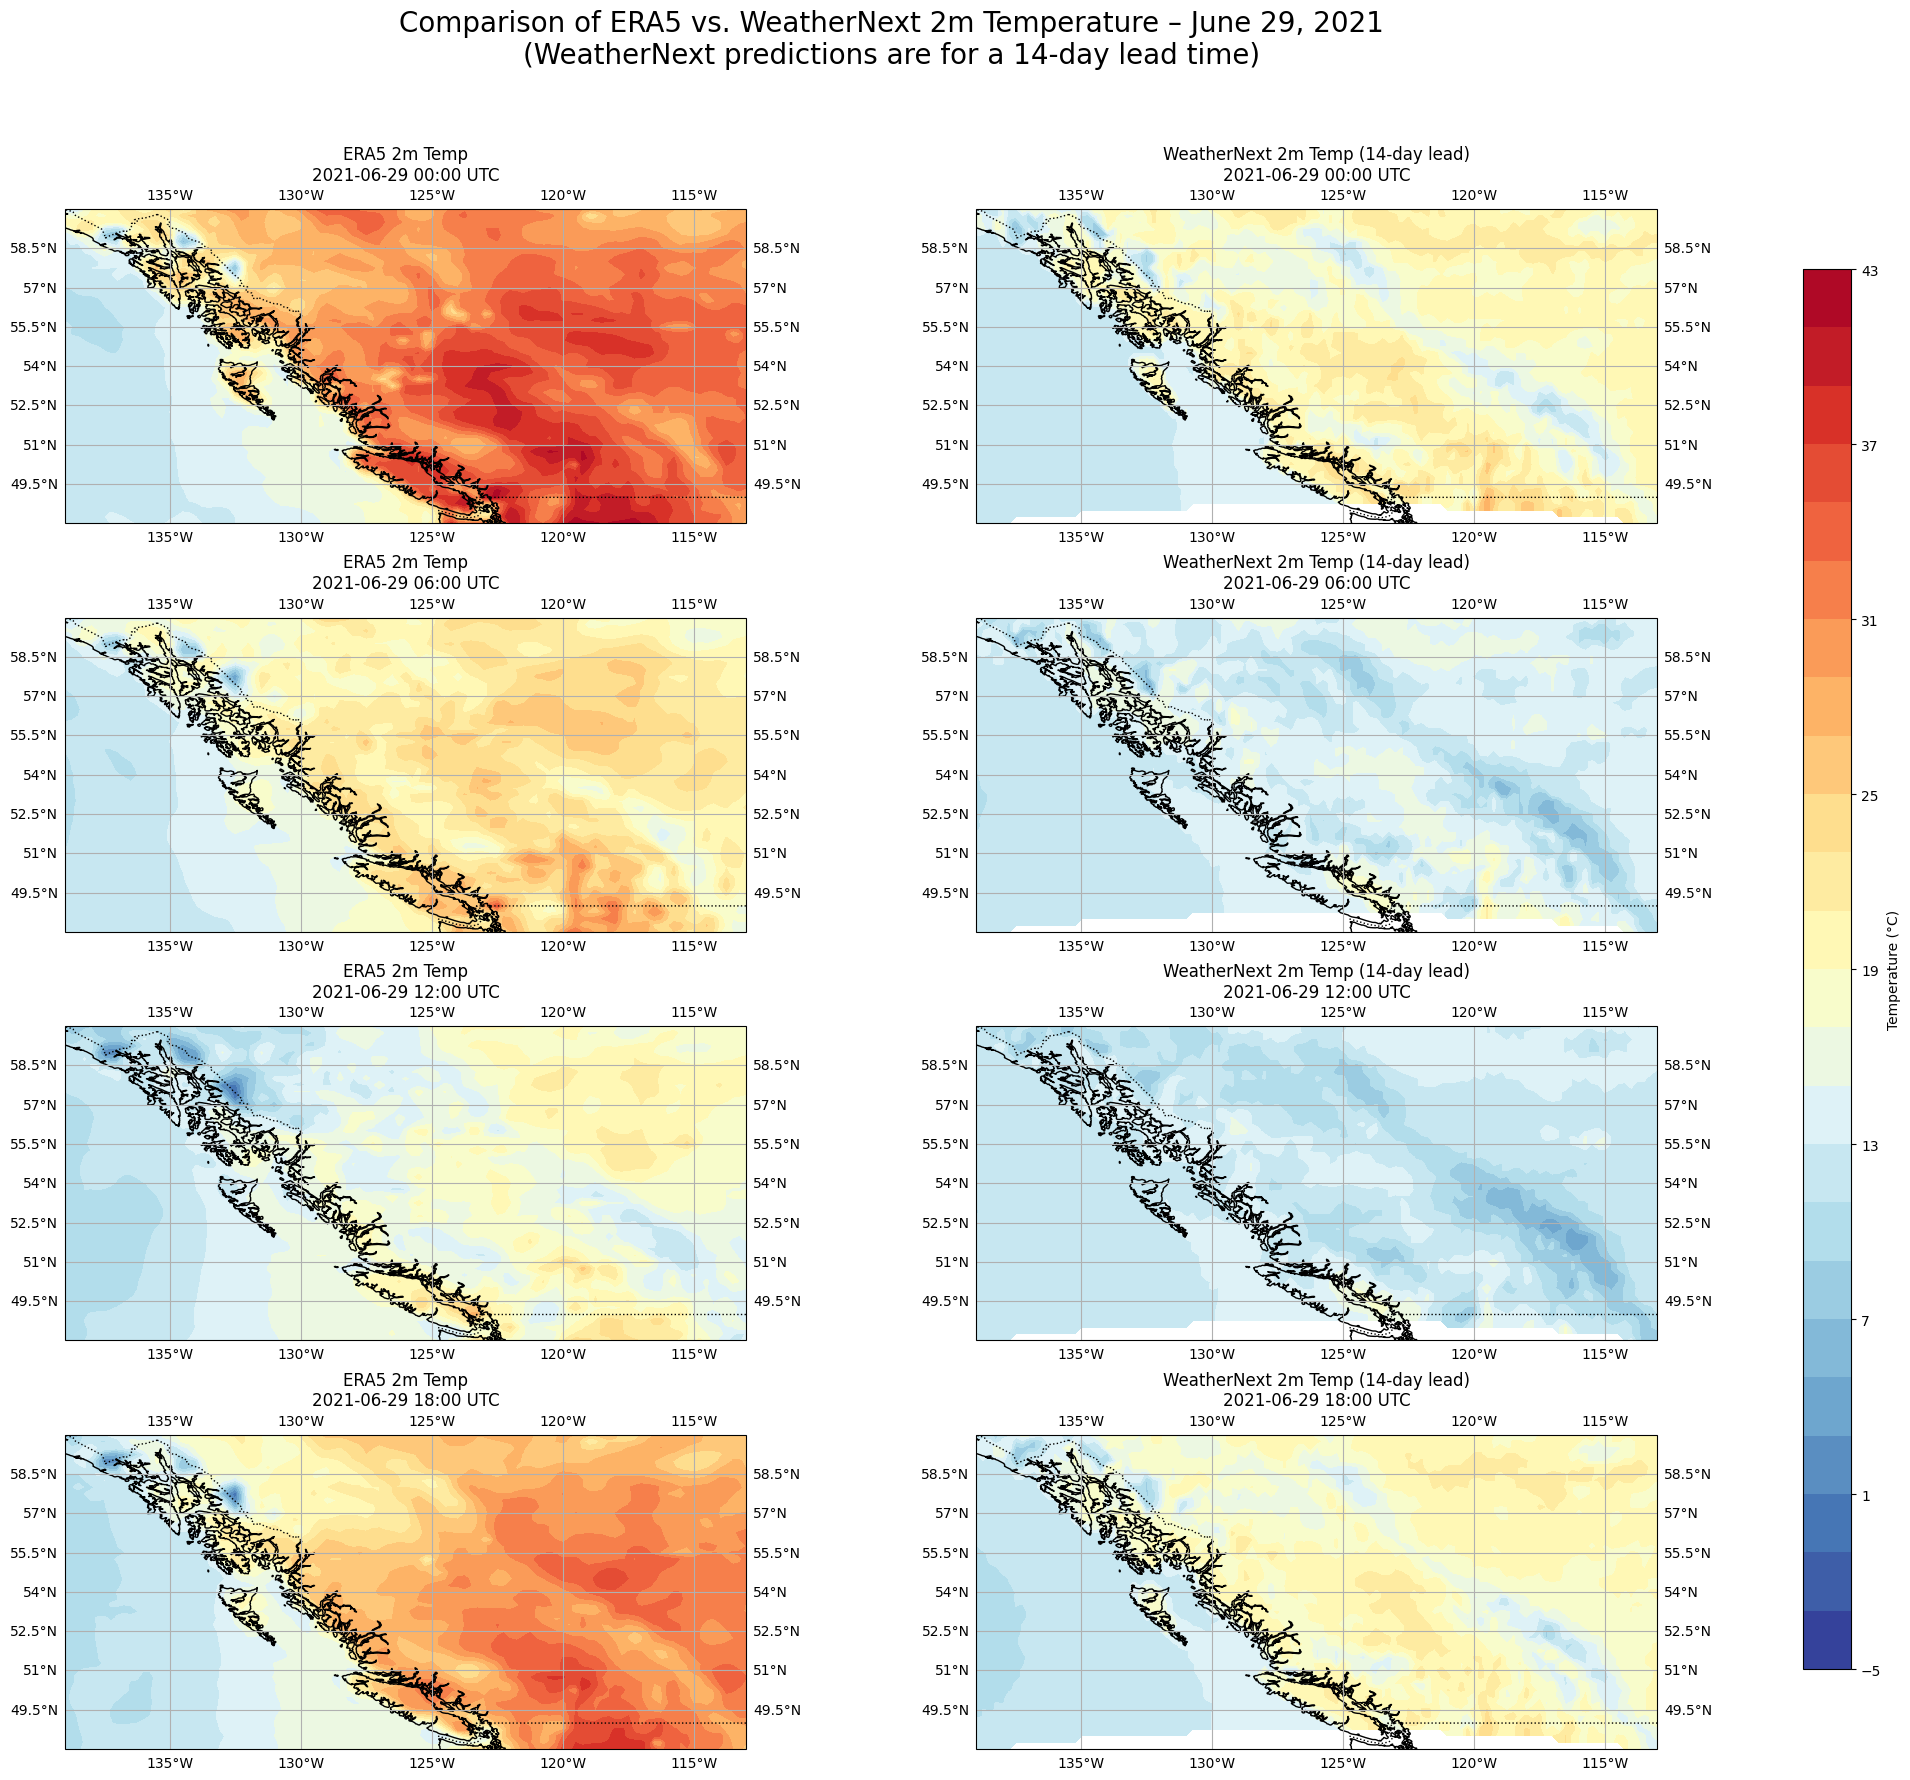

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

# Define common contour levels (in °C)
levels = np.arange(-5, 45, 2)

# Create a subplot grid with 4 rows (one per forecast time) and 2 columns (ERA5 on left, WeatherNext on right)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop over the 4 unique forecast times.
for i, t in enumerate(unique_times):
    # Convert t (a timezone-aware Timestamp) to a naive datetime that matches ERA5's "valid_time"
    t_naive = pd.Timestamp(t).tz_localize(None)
    
    # ---------------------------
    # Left Column: ERA5 2m Temperature
    # ---------------------------
    # Select ERA5's 2m temperature for this forecast time and convert from Kelvin to Celsius.
    era5_temp = ds.t2m.sel(valid_time=t_naive, method='nearest') - 273.15

    ax_left = axs[i, 0]
    im_left = ax_left.contourf(era5_temp.longitude, era5_temp.latitude, era5_temp,
                               levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_left.coastlines()
    ax_left.add_feature(cfeature.BORDERS, linestyle=':')
    ax_left.gridlines(draw_labels=True)
    ax_left.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                       crs=ccrs.PlateCarree())
    time_str = t_naive.strftime('%Y-%m-%d %H:%M UTC')
    ax_left.set_title(f"ERA5 2m Temp\n{time_str}")

    # ---------------------------
    # Right Column: WeatherNext 2m Temperature (14-day lead time)
    # ---------------------------
    # Here we assume the ordering in weatherNext_da_june29 matches unique_times.
    # Convert from Kelvin to Celsius on the fly.
    wn_temp = weatherNext_da_june29.isel(time=i) - 273.15

    ax_right = axs[i, 1]
    im_right = ax_right.contourf(wn_temp.longitude, wn_temp.latitude, wn_temp,
                                 levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_right.coastlines()
    ax_right.add_feature(cfeature.BORDERS, linestyle=':')
    ax_right.gridlines(draw_labels=True)
    ax_right.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                        crs=ccrs.PlateCarree())
    ax_right.set_title(f"WeatherNext 2m Temp (14-day lead)\n{time_str}")

# Adjust layout and add a common colorbar.
fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.3)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im_right, cax=cbar_ax, label="Temperature (°C)")

plt.suptitle("Comparison of ERA5 vs. WeatherNext 2m Temperature – June 29, 2021\n(WeatherNext predictions are for a 14-day lead time)",
             fontsize=20)

# Save the figure as a PNG file with high resolution.
plt.savefig("era5_vs_weathernext_14day_prediction.png", dpi=1000, bbox_inches='tight')
plt.show()

## 7-day lead prediction

ERA5 valid times: ['2021-06-25T00:00:00.000000000' '2021-06-25T06:00:00.000000000'
 '2021-06-25T12:00:00.000000000' '2021-06-25T18:00:00.000000000'
 '2021-06-26T00:00:00.000000000' '2021-06-26T06:00:00.000000000'
 '2021-06-26T12:00:00.000000000' '2021-06-26T18:00:00.000000000'
 '2021-06-27T00:00:00.000000000' '2021-06-27T06:00:00.000000000'
 '2021-06-27T12:00:00.000000000' '2021-06-27T18:00:00.000000000'
 '2021-06-28T00:00:00.000000000' '2021-06-28T06:00:00.000000000'
 '2021-06-28T12:00:00.000000000' '2021-06-28T18:00:00.000000000'
 '2021-06-29T00:00:00.000000000' '2021-06-29T06:00:00.000000000'
 '2021-06-29T12:00:00.000000000' '2021-06-29T18:00:00.000000000'
 '2021-06-30T00:00:00.000000000' '2021-06-30T06:00:00.000000000'
 '2021-06-30T12:00:00.000000000' '2021-06-30T18:00:00.000000000'
 '2021-07-01T00:00:00.000000000' '2021-07-01T06:00:00.000000000'
 '2021-07-01T12:00:00.000000000' '2021-07-01T18:00:00.000000000'
 '2021-07-02T00:00:00.000000000' '2021-07-02T06:00:00.000000000'
 '2021-

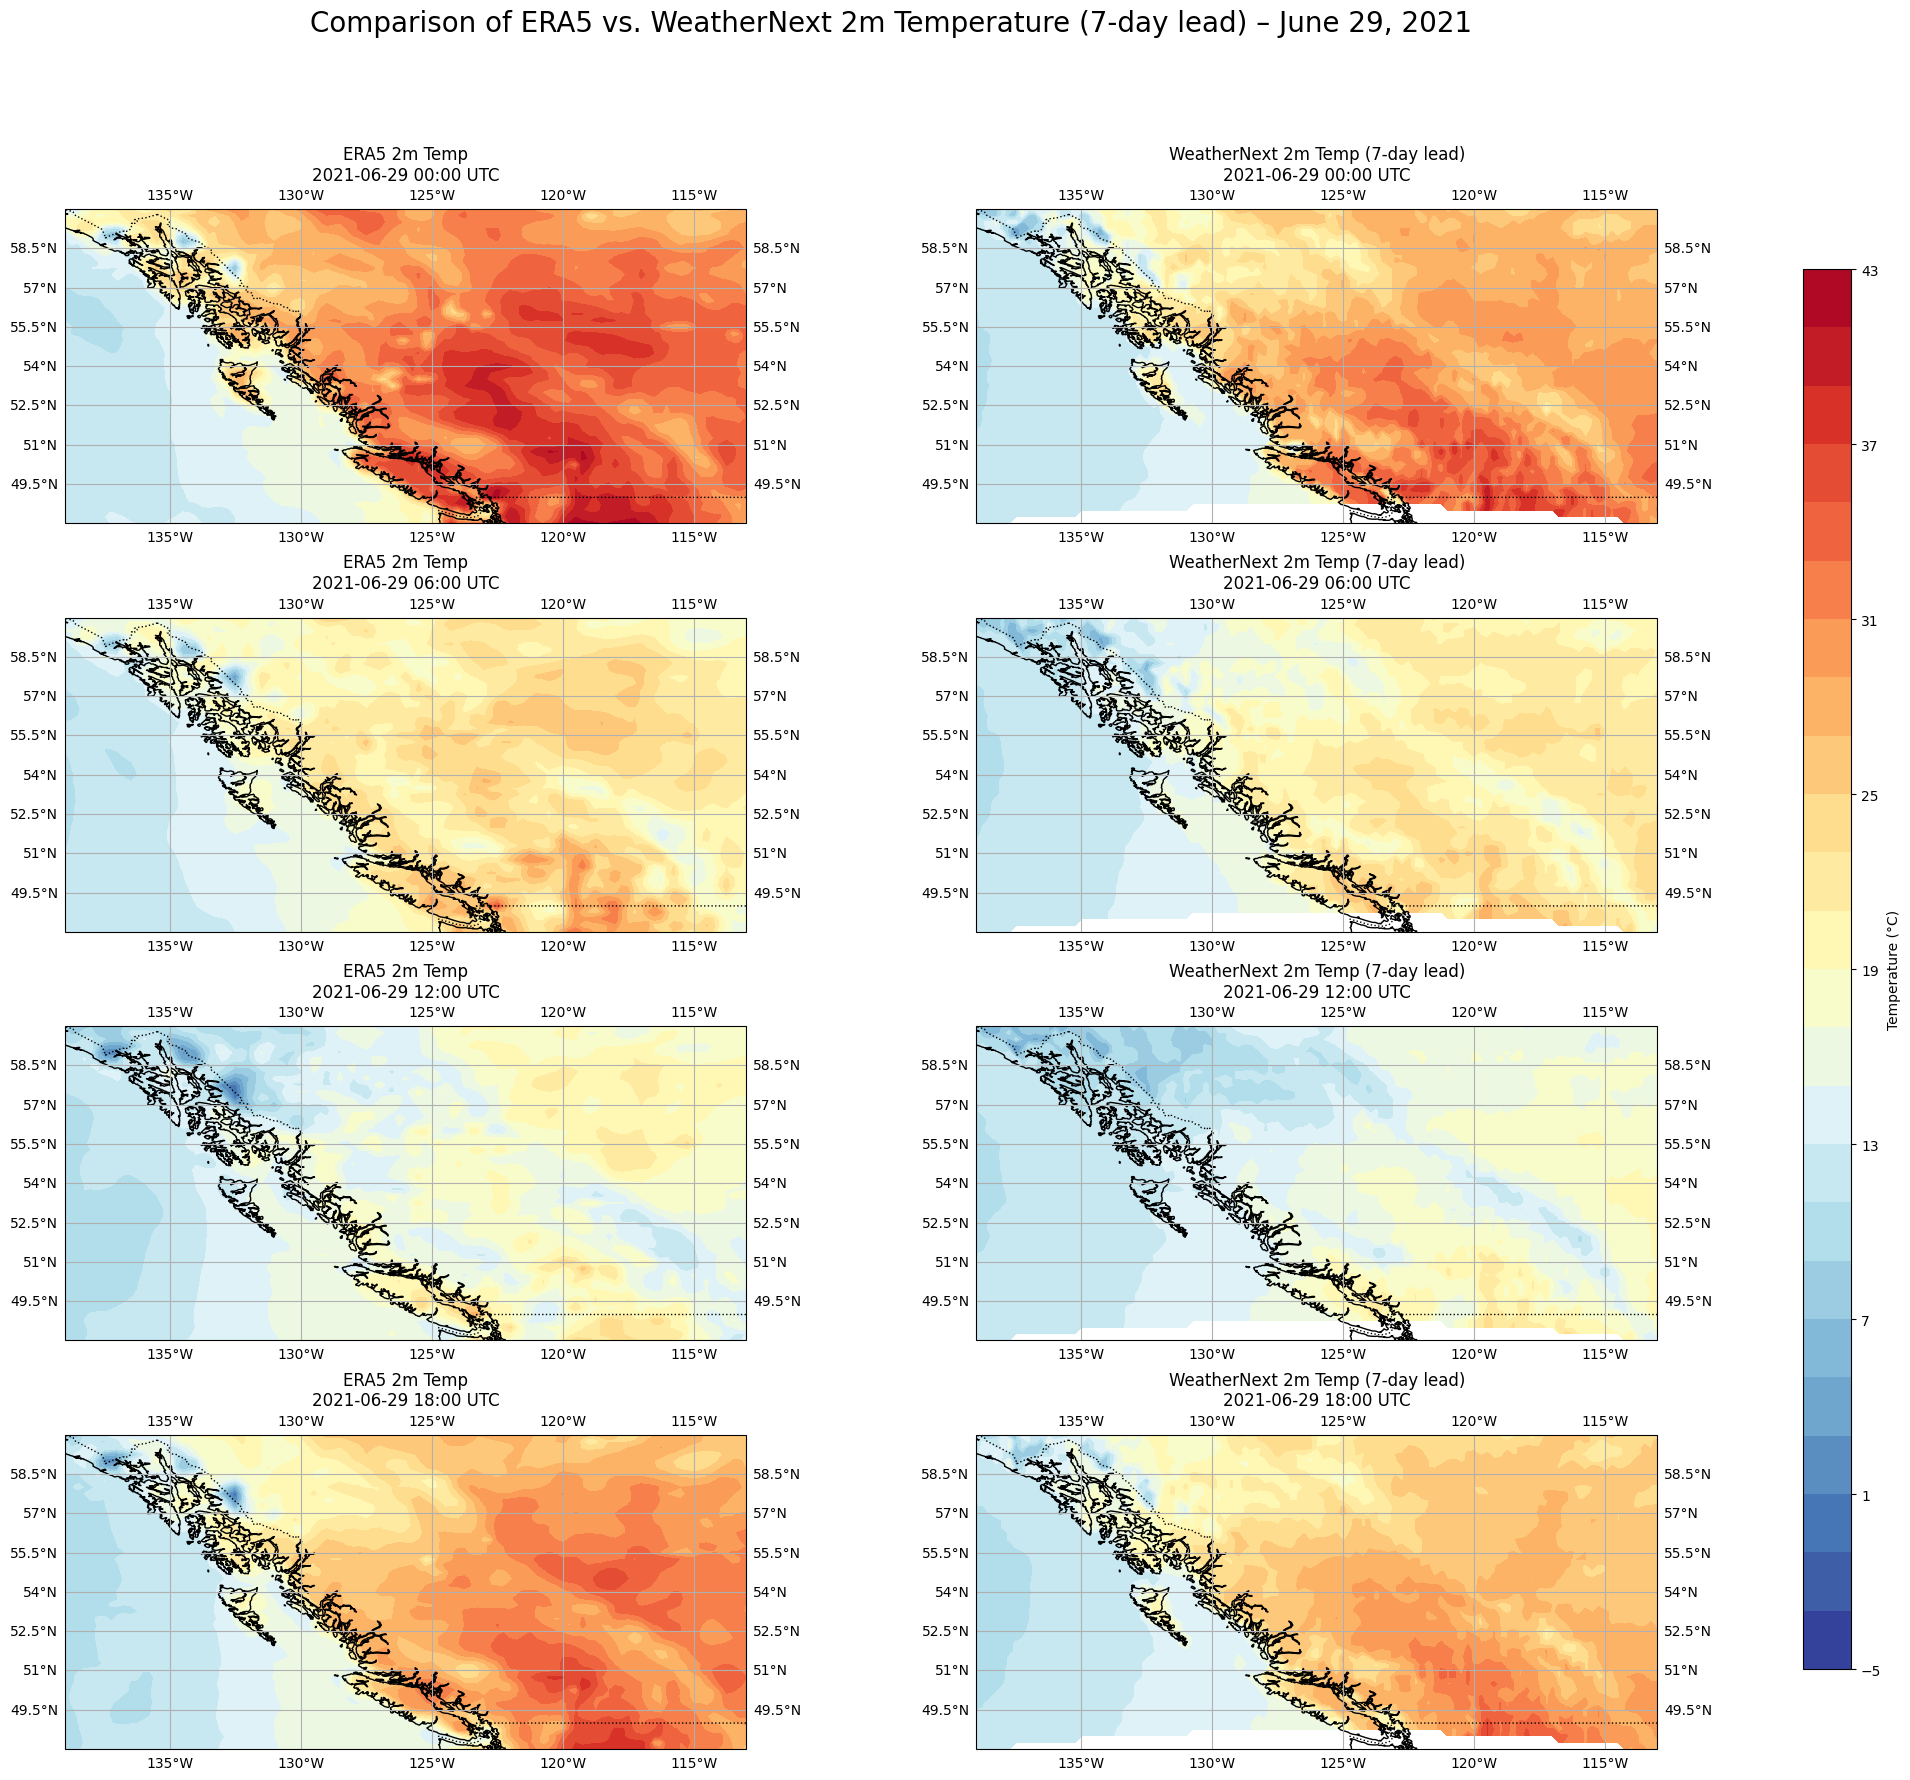

In [14]:
import subprocess
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads as wkt_loads
import xarray as xr
import numpy as np
import affine
import rasterio.features as features
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ========================================================
# A. Load ERA5 Data (already done) and define target grid
# ========================================================
# (Assuming you already ran the following to load ERA5 data for June 29)
# !gsutil cp gs://gencast/ERA5_2021_06/data_stream-oper_stepType-instant.nc /tmp/era5_june.nc
# ds = xr.open_dataset('/tmp/era5_june.nc', engine='netcdf4').sel(valid_time=slice("2021-06-29T00:00:00", "2021-06-29T23:59:59"))
print("ERA5 valid times:", ds.valid_time.values)

target_lat = ds['latitude'].values
target_lon = ds['longitude'].values
dx = target_lon[1] - target_lon[0]
dy = target_lat[1] - target_lat[0]
transform = affine.Affine(dx, 0.0, target_lon.min(),
                          0.0, -abs(dy), target_lat.max())
print("ERA5 grid defined with affine transform:")
print(transform)
# Expected output:
# | 0.25, 0.00, -139.00|
# | 0.00, -0.25, 60.00 |
# | 0.00, 0.00, 1.00   |

# ========================================================
# B. Load and Clean WeatherNext 7-Day Lead Time Data
# ========================================================
# We'll load the CSV files from a 7-day lead time folder.
# (Make sure the folder name/path is correct; here we assume it is:
#  gs://gencast/weathernext/weathernext_bc_heatwave_2021_avg_sd_7days/ )
cols = [
    "init_time",
    "forecast_time",
    "geography_polygon_text",
    "geography_text",
    
    "avg_total_precipitation_12hr", "sd_total_precipitation_12hr",
    "avg_100m_u_component_of_wind", "sd_100m_u_component_of_wind",
    "avg_100m_v_component_of_wind", "sd_100m_v_component_of_wind",
    "avg_10m_u_component_of_wind", "sd_10m_u_component_of_wind",
    "avg_10m_v_component_of_wind", "sd_10m_v_component_of_wind",
    "avg_2m_temperature", "sd_2m_temperature",
    "avg_mean_sea_level_pressure", "sd_mean_sea_level_pressure",
    "avg_sea_surface_temperature", "sd_sea_surface_temperature"
]

# List files from the 7-day lead time dataset.
files = subprocess.check_output([
    'gsutil', 'ls',
    'gs://gencast/weathernext/weathernext_bc_heatwave_2021_avg_sd_7days/*.csv'
]).decode().strip().split('\n')
print(f"Loading {len(files)} files from 7-day lead dataset...")

# Read and concatenate all CSV files
df = pd.concat([pd.read_csv(f, names=cols, header=None) for f in files], ignore_index=True)

# Convert time columns to datetime.
df['init_time'] = pd.to_datetime(df['init_time'], errors='coerce')
df['forecast_time'] = pd.to_datetime(df['forecast_time'], errors='coerce')

# Create a geometry column from the WKT polygon text.
df['geometry'] = df['geography_polygon_text'].apply(wkt_loads)

# Create a GeoDataFrame with CRS EPSG:4326.
gdf_7day = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Quick check of the GeoDataFrame.
print(gdf_7day.head())
print("Forecast time range:",
      gdf_7day['forecast_time'].min(), "to", gdf_7day['forecast_time'].max())

# For consistency, filter to forecast times on June 29, 2021.
selected_date = pd.Timestamp("2021-06-29").date()
gdf_7day_june29 = gdf_7day[gdf_7day["forecast_time"].dt.date == selected_date]

# Choose the first 4 unique forecast times for illustration.
unique_times_7day = sorted(gdf_7day_june29["forecast_time"].unique())[:4]
print("Unique forecast times (7-day lead) selected:", unique_times_7day)

# ========================================================
# C. Regrid WeatherNext 7-Day Data to ERA5 Grid
# ========================================================
def rasterize_timestamp(gdf_subset, target_lon, target_lat, transform, value_col):
    """
    Rasterizes WeatherNext polygon geometries for one forecast time.

    Parameters:
      gdf_subset: GeoDataFrame for one forecast time.
      target_lon: 1D array of ERA5 grid longitudes.
      target_lat: 1D array of ERA5 grid latitudes.
      transform: affine.Affine transform for the ERA5 grid.
      value_col: Name of the column to rasterize (e.g., "avg_2m_temperature").

    Returns:
      A 2D numpy array on the ERA5 grid.
    """
    shapes = [(geom, val) for geom, val in zip(gdf_subset.geometry, gdf_subset[value_col])]
    nlat, nlon = len(target_lat), len(target_lon)
    # Use the 'replace' merge algorithm so the cell value is directly overwritten.
    rasterized = features.rasterize(
        shapes=shapes,
        out_shape=(nlat, nlon),
        transform=transform,
        fill=np.nan,
        merge_alg=features.MergeAlg.replace
    )
    return rasterized

# Loop over the selected forecast times and regrid.
regridded_list_7day = []
for t in unique_times_7day:
    gdf_t = gdf_7day_june29[gdf_7day_june29["forecast_time"] == t]
    print(f"\nFor 7-day forecast time {t}, number of records: {len(gdf_t)}")
    raster = rasterize_timestamp(gdf_t, target_lon, target_lat, transform, "avg_2m_temperature")
    print(f"Rasterized stats for time {t}: min = {np.nanmin(raster)}, max = {np.nanmax(raster)}")
    da = xr.DataArray(raster,
                      coords={"latitude": target_lat, "longitude": target_lon},
                      dims=["latitude", "longitude"])
    da = da.expand_dims(time=[pd.to_datetime(t)])
    regridded_list_7day.append(da)

weatherNext_da_7day = xr.concat(regridded_list_7day, dim="time")
print("\nFinal Regridded WeatherNext 7-day DataArray (in Kelvin):")
print(weatherNext_da_7day)


# ========================================================
# D. Plot Side-by-Side Comparison of ERA5 and WeatherNext (7-Day) Maps
# ========================================================
# Define contour levels (in °C)
levels = np.arange(-5, 45, 2)

# Create a subplot grid with 4 rows (one per forecast time) and 2 columns.
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop over the four forecast times (using the unique_times_7day array).
for i, t in enumerate(unique_times_7day):
    # Convert forecast time to naive datetime to match ERA5's "valid_time" coordinate.
    t_naive = pd.Timestamp(t).tz_localize(None)
    
    # --- Left: ERA5 2m Temperature ---
    era5_temp = ds.t2m.sel(valid_time=t_naive, method='nearest') - 273.15  # in °C
    ax_left = axs[i, 0]
    im_left = ax_left.contourf(era5_temp.longitude, era5_temp.latitude, era5_temp,
                               levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_left.coastlines()
    ax_left.add_feature(cfeature.BORDERS, linestyle=':')
    ax_left.gridlines(draw_labels=True)
    ax_left.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                       crs=ccrs.PlateCarree())
    time_str = t_naive.strftime('%Y-%m-%d %H:%M UTC')
    ax_left.set_title(f"ERA5 2m Temp\n{time_str}")

    # --- Right: WeatherNext 2m Temperature (7-day lead) ---
    # Use the regridded 7-day DataArray and convert from Kelvin to Celsius.
    wn_temp = weatherNext_da_7day.isel(time=i) - 273.15
    ax_right = axs[i, 1]
    im_right = ax_right.contourf(wn_temp.longitude, wn_temp.latitude, wn_temp,
                                 levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_right.coastlines()
    ax_right.add_feature(cfeature.BORDERS, linestyle=':')
    ax_right.gridlines(draw_labels=True)
    ax_right.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                        crs=ccrs.PlateCarree())
    ax_right.set_title(f"WeatherNext 2m Temp (7-day lead)\n{time_str}")

# Adjust layout and add a common colorbar.
fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.3)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im_right, cax=cbar_ax, label="Temperature (°C)")
plt.suptitle("Comparison of ERA5 vs. WeatherNext 2m Temperature (7-day lead) – June 29, 2021", fontsize=20)

# Save the figure to a file.
plt.savefig("era5_vs_weathernext_7day_prediction.png", dpi=1000, bbox_inches='tight')
plt.show()


## 3-day lead prediction

Loading 1 files from 3-day lead dataset...
                  init_time             forecast_time  \
0 2021-06-22 00:00:00+00:00 2021-06-25 00:00:00+00:00   
1 2021-06-22 00:00:00+00:00 2021-06-25 00:00:00+00:00   
2 2021-06-22 00:00:00+00:00 2021-06-25 00:00:00+00:00   
3 2021-06-22 00:00:00+00:00 2021-06-25 00:00:00+00:00   
4 2021-06-22 00:00:00+00:00 2021-06-25 00:00:00+00:00   

                              geography_polygon_text       geography_text  \
0  POLYGON((-114.375 55.875, -114.375 56.125, -11...     POINT(-114.5 56)   
1  POLYGON((-120.125 59.375, -120.125 59.625, -12...  POINT(-120.25 59.5)   
2  POLYGON((-138.625 54.875, -138.625 55.125, -13...    POINT(-138.75 55)   
3  POLYGON((-135.125 54.375, -135.125 54.625, -13...  POINT(-135.25 54.5)   
4  POLYGON((-131.375 51.375, -131.375 51.625, -13...   POINT(-131.5 51.5)   

   avg_total_precipitation_12hr  sd_total_precipitation_12hr  \
0                      0.000034                     0.000073   
1                      

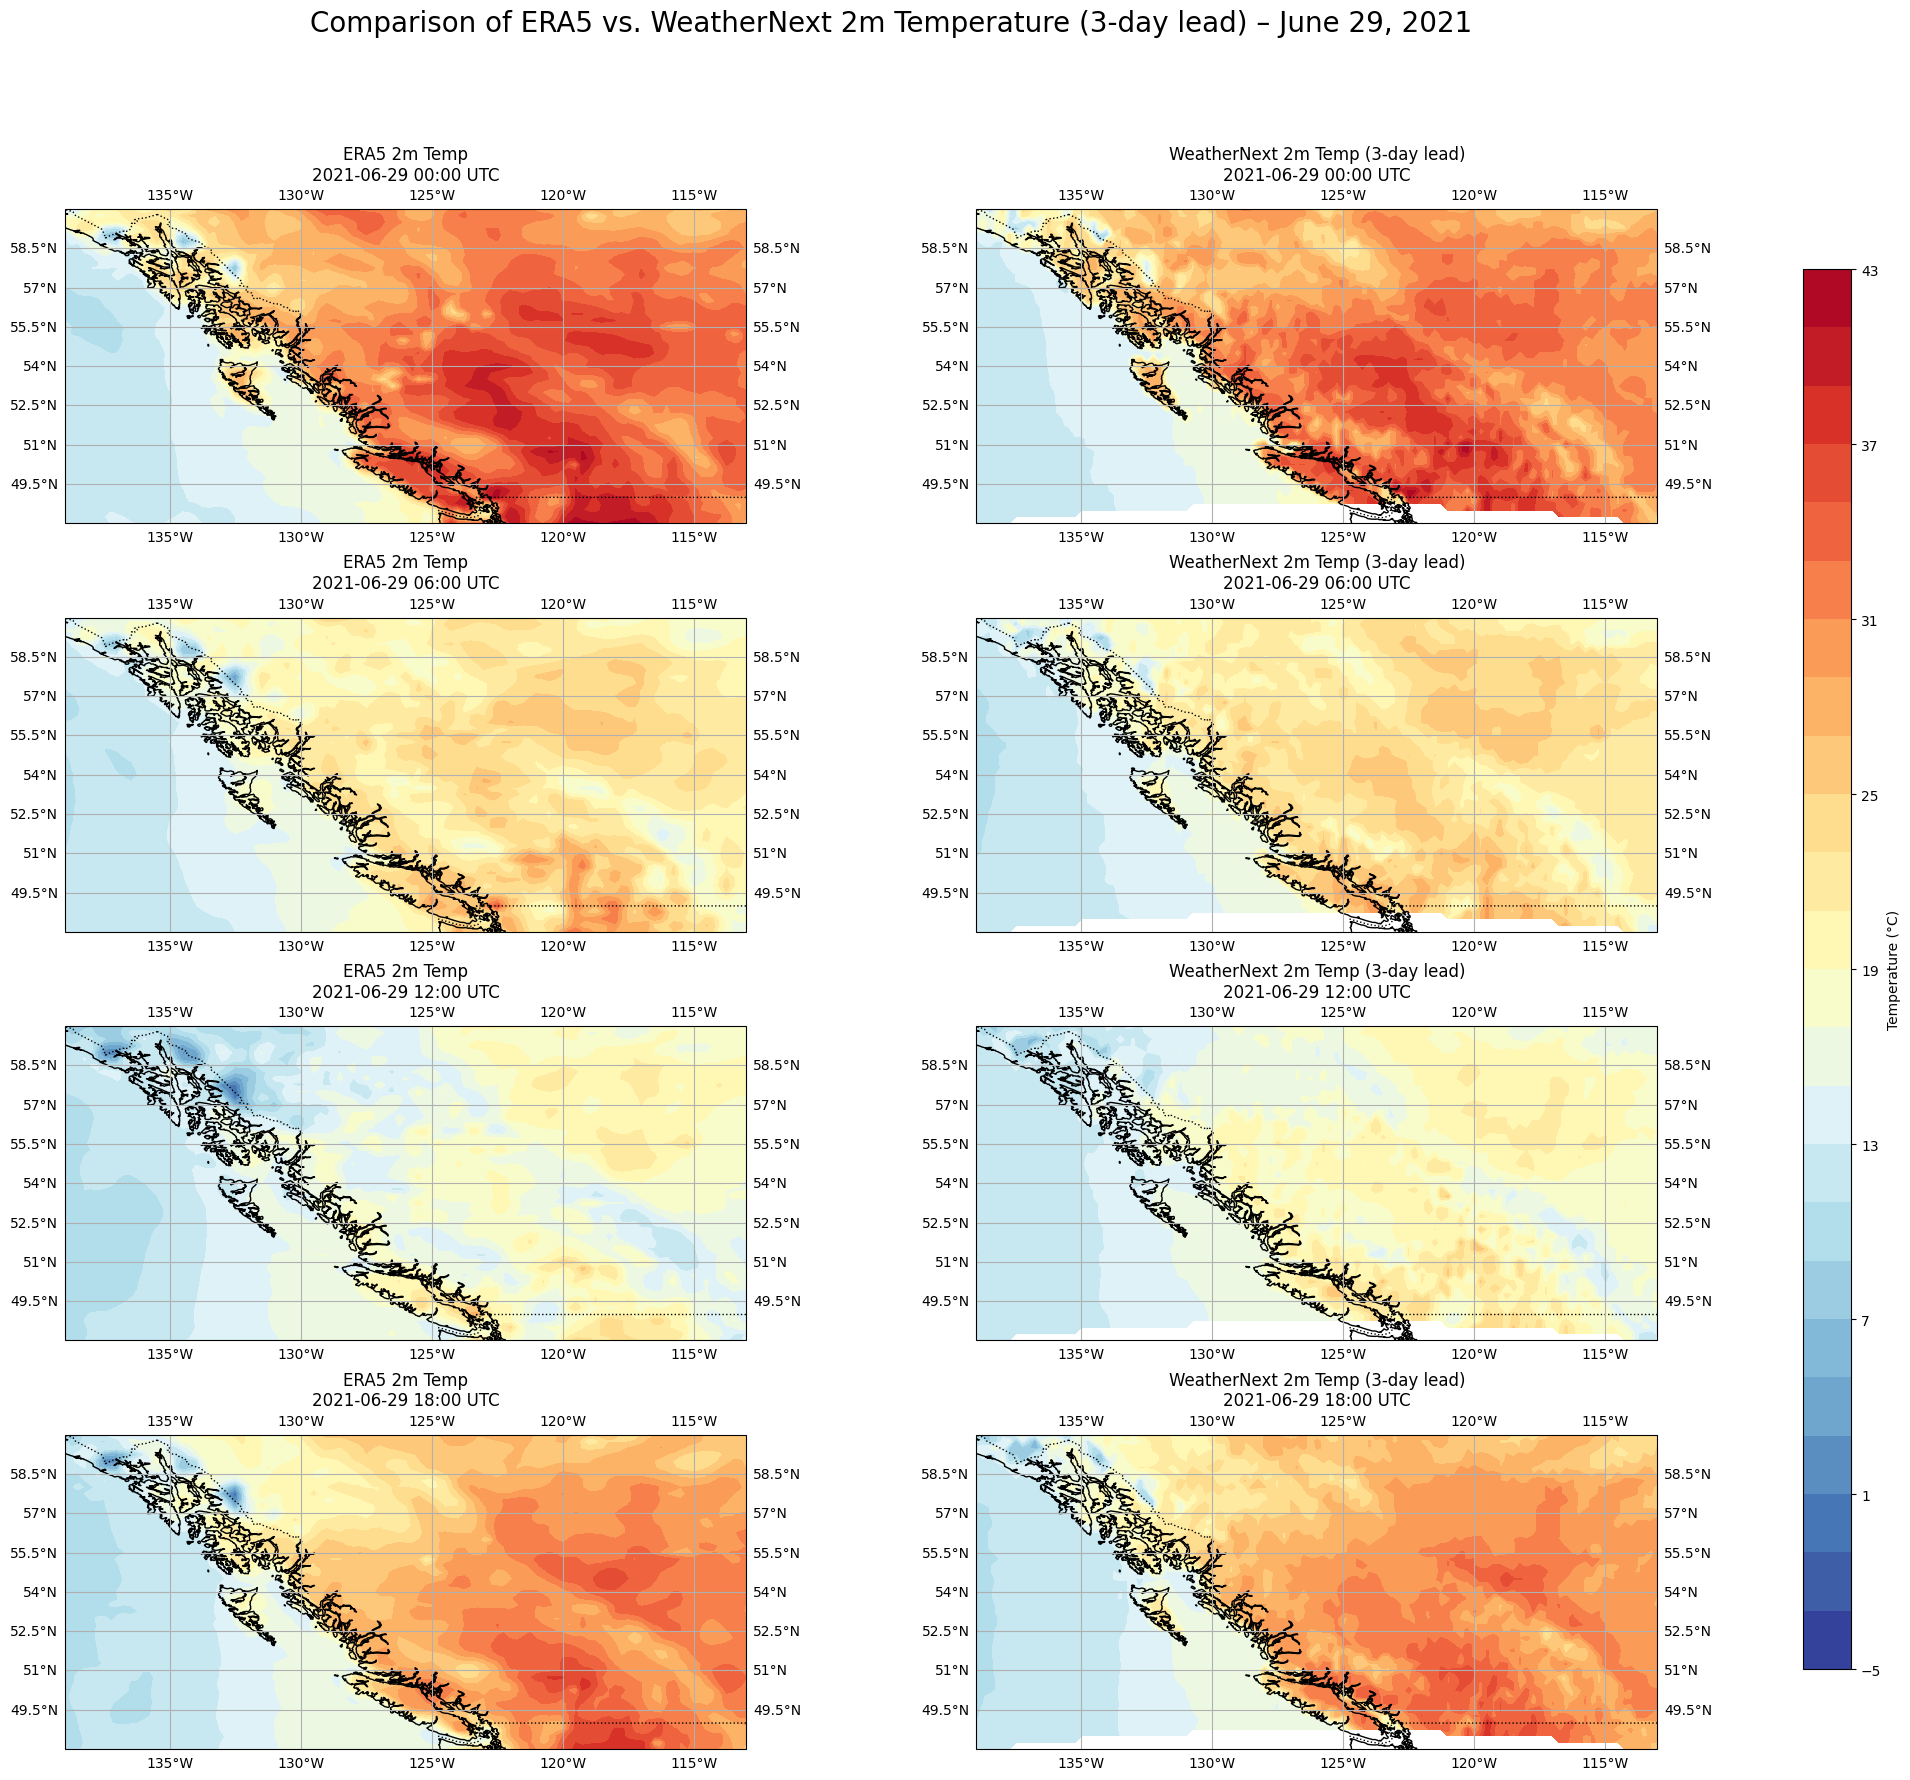

In [15]:
import subprocess
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads as wkt_loads
import xarray as xr
import numpy as np
import affine
import rasterio.features as features
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Define columns for CSV reading ---
cols = [
    "init_time",
    "forecast_time",
    "geography_polygon_text",
    "geography_text",
    
    "avg_total_precipitation_12hr", "sd_total_precipitation_12hr",
    "avg_100m_u_component_of_wind", "sd_100m_u_component_of_wind",
    "avg_100m_v_component_of_wind", "sd_100m_v_component_of_wind",
    "avg_10m_u_component_of_wind", "sd_10m_u_component_of_wind",
    "avg_10m_v_component_of_wind", "sd_10m_v_component_of_wind",
    "avg_2m_temperature", "sd_2m_temperature",
    "avg_mean_sea_level_pressure", "sd_mean_sea_level_pressure",
    "avg_sea_surface_temperature", "sd_sea_surface_temperature"
]

# --- List and load CSV files from the 3-day lead time dataset ---
files_3day = subprocess.check_output([
    'gsutil', 'ls',
    'gs://gencast/weathernext/weathernext_bc_heatwave_2021_avg_sd_3days/*.csv'
]).decode().strip().split('\n')
print(f"Loading {len(files_3day)} files from 3-day lead dataset...")

df_3day = pd.concat([pd.read_csv(f, names=cols, header=None) for f in files_3day], ignore_index=True)

# Convert time columns and create geometry
df_3day['init_time'] = pd.to_datetime(df_3day['init_time'], errors='coerce')
df_3day['forecast_time'] = pd.to_datetime(df_3day['forecast_time'], errors='coerce')
df_3day['geometry'] = df_3day['geography_polygon_text'].apply(wkt_loads)

gdf_3day = gpd.GeoDataFrame(df_3day, geometry='geometry', crs="EPSG:4326")
print(gdf_3day.head())
print("Forecast time range (3-day):", gdf_3day['forecast_time'].min(), "to", gdf_3day['forecast_time'].max())

# Filter for forecast times on June 29, 2021.
selected_date = pd.Timestamp("2021-06-29").date()
gdf_3day_june29 = gdf_3day[gdf_3day["forecast_time"].dt.date == selected_date]

# Select the first 4 unique forecast times.
unique_times_3day = sorted(gdf_3day_june29["forecast_time"].unique())[:4]
print("Unique forecast times (3-day) selected:", unique_times_3day)

# --- Define rasterization function ---
def rasterize_timestamp(gdf_subset, target_lon, target_lat, transform, value_col):
    shapes = [(geom, val) for geom, val in zip(gdf_subset.geometry, gdf_subset[value_col])]
    nlat, nlon = len(target_lat), len(target_lon)
    rasterized = features.rasterize(
        shapes=shapes,
        out_shape=(nlat, nlon),
        transform=transform,
        fill=np.nan,
        merge_alg=features.MergeAlg.replace
    )
    return rasterized

# --- Regrid the 3-day WeatherNext data ---
regridded_list_3day = []
for t in unique_times_3day:
    gdf_t = gdf_3day_june29[gdf_3day_june29["forecast_time"] == t]
    print(f"\nFor 3-day forecast time {t}, number of records: {len(gdf_t)}")
    raster = rasterize_timestamp(gdf_t, target_lon, target_lat, transform, "avg_2m_temperature")
    print(f"Rasterized stats (3-day) for time {t}: min = {np.nanmin(raster)}, max = {np.nanmax(raster)}")
    da = xr.DataArray(raster,
                      coords={"latitude": target_lat, "longitude": target_lon},
                      dims=["latitude", "longitude"])
    da = da.expand_dims(time=[pd.to_datetime(t)])
    regridded_list_3day.append(da)

weatherNext_da_3day = xr.concat(regridded_list_3day, dim="time")
print("\nFinal Regridded WeatherNext 3-day DataArray (in Kelvin):")
print(weatherNext_da_3day)

# --- Plot side-by-side comparison for 3-day lead ---
levels = np.arange(-5, 45, 2)  # Contour levels (in °C)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24, 20), subplot_kw={'projection': ccrs.PlateCarree()})

for i, t in enumerate(unique_times_3day):
    # Convert forecast time to naive datetime for ERA5 indexing.
    t_naive = pd.Timestamp(t).tz_localize(None)
    
    # Left: ERA5 2m Temperature (in °C)
    era5_temp = ds.t2m.sel(valid_time=t_naive, method='nearest') - 273.15
    ax_left = axs[i, 0]
    im_left = ax_left.contourf(era5_temp.longitude, era5_temp.latitude, era5_temp,
                               levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_left.coastlines()
    ax_left.add_feature(cfeature.BORDERS, linestyle=':')
    ax_left.gridlines(draw_labels=True)
    ax_left.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                       crs=ccrs.PlateCarree())
    time_str = t_naive.strftime('%Y-%m-%d %H:%M UTC')
    ax_left.set_title(f"ERA5 2m Temp\n{time_str}")

    # Right: WeatherNext 2m Temperature (3-day lead, Kelvin → °C)
    wn_temp = weatherNext_da_3day.isel(time=i) - 273.15
    ax_right = axs[i, 1]
    im_right = ax_right.contourf(wn_temp.longitude, wn_temp.latitude, wn_temp,
                                 levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_right.coastlines()
    ax_right.add_feature(cfeature.BORDERS, linestyle=':')
    ax_right.gridlines(draw_labels=True)
    ax_right.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                        crs=ccrs.PlateCarree())
    ax_right.set_title(f"WeatherNext 2m Temp (3-day lead)\n{time_str}")

fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.3)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im_right, cax=cbar_ax, label="Temperature (°C)")
plt.suptitle("Comparison of ERA5 vs. WeatherNext 2m Temperature (3-day lead) – June 29, 2021", fontsize=20)
plt.savefig("era5_vs_weathernext_3day_prediction.png", dpi=1000, bbox_inches='tight')
plt.show()


## 1-day

Loading 1 files from 1-day lead dataset...
                  init_time             forecast_time  \
0 2021-06-24 00:00:00+00:00 2021-06-25 00:00:00+00:00   
1 2021-06-24 00:00:00+00:00 2021-06-25 00:00:00+00:00   
2 2021-06-24 00:00:00+00:00 2021-06-25 00:00:00+00:00   
3 2021-06-24 00:00:00+00:00 2021-06-25 00:00:00+00:00   
4 2021-06-24 00:00:00+00:00 2021-06-25 00:00:00+00:00   

                              geography_polygon_text       geography_text  \
0  POLYGON((-121.375 49.375, -121.375 49.625, -12...   POINT(-121.5 49.5)   
1  POLYGON((-127.625 59.375, -127.625 59.625, -12...  POINT(-127.75 59.5)   
2  POLYGON((-113.875 55.875, -113.875 56.125, -11...       POINT(-114 56)   
3  POLYGON((-117.625 54.375, -117.625 54.625, -11...  POINT(-117.75 54.5)   
4  POLYGON((-118.125 60.375, -118.125 60.625, -11...  POINT(-118.25 60.5)   

   avg_total_precipitation_12hr  sd_total_precipitation_12hr  \
0                      0.000087                     0.000121   
1                      

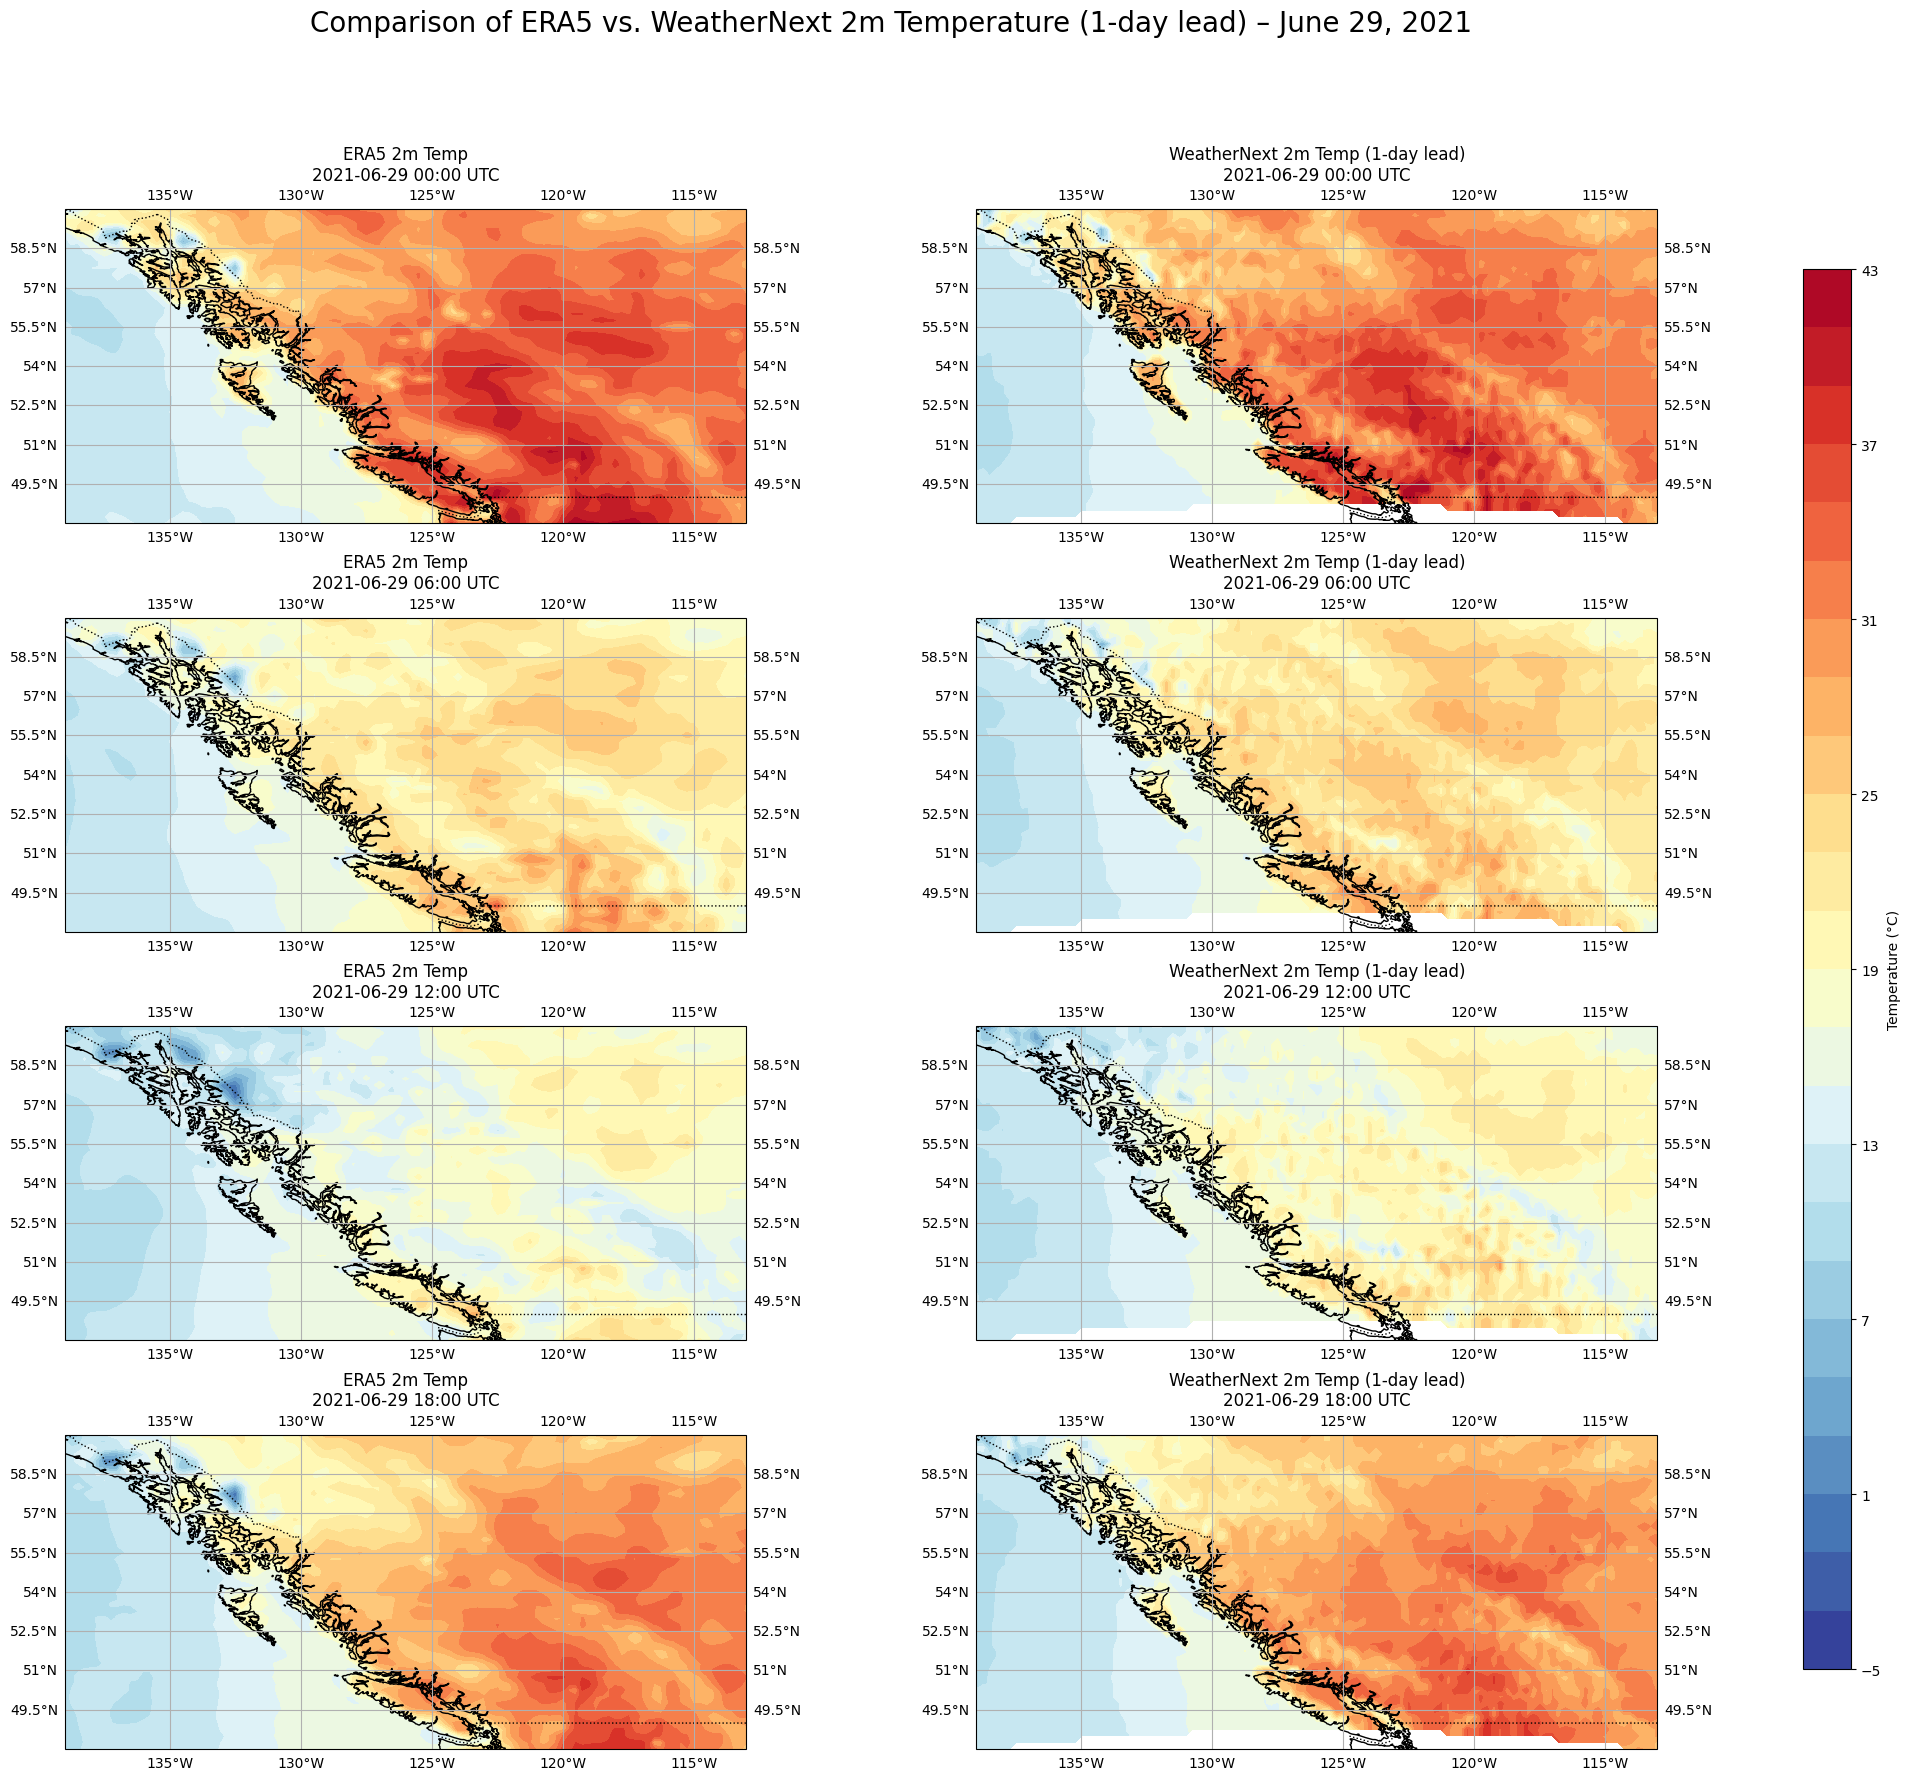

In [16]:
import subprocess
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads as wkt_loads
import xarray as xr
import numpy as np
import affine
import rasterio.features as features
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Use the same column definitions as before ---
cols = [
    "init_time",
    "forecast_time",
    "geography_polygon_text",
    "geography_text",
    
    "avg_total_precipitation_12hr", "sd_total_precipitation_12hr",
    "avg_100m_u_component_of_wind", "sd_100m_u_component_of_wind",
    "avg_100m_v_component_of_wind", "sd_100m_v_component_of_wind",
    "avg_10m_u_component_of_wind", "sd_10m_u_component_of_wind",
    "avg_10m_v_component_of_wind", "sd_10m_v_component_of_wind",
    "avg_2m_temperature", "sd_2m_temperature",
    "avg_mean_sea_level_pressure", "sd_mean_sea_level_pressure",
    "avg_sea_surface_temperature", "sd_sea_surface_temperature"
]

# --- List files from the 1-day lead time dataset ---
files_1day = subprocess.check_output([
    'gsutil', 'ls',
    'gs://gencast/weathernext/weathernext_bc_heatwave_2021_avg_sd_1day/*.csv'
]).decode().strip().split('\n')
print(f"Loading {len(files_1day)} files from 1-day lead dataset...")

df_1day = pd.concat([pd.read_csv(f, names=cols, header=None) for f in files_1day], ignore_index=True)

# Convert time columns and create geometry.
df_1day['init_time'] = pd.to_datetime(df_1day['init_time'], errors='coerce')
df_1day['forecast_time'] = pd.to_datetime(df_1day['forecast_time'], errors='coerce')
df_1day['geometry'] = df_1day['geography_polygon_text'].apply(wkt_loads)
gdf_1day = gpd.GeoDataFrame(df_1day, geometry='geometry', crs="EPSG:4326")
print(gdf_1day.head())
print("Forecast time range (1-day):", gdf_1day['forecast_time'].min(), "to", gdf_1day['forecast_time'].max())

# Filter for forecast times on June 29, 2021.
selected_date = pd.Timestamp("2021-06-29").date()
gdf_1day_june29 = gdf_1day[gdf_1day["forecast_time"].dt.date == selected_date]

# Select the first 4 unique forecast times.
unique_times_1day = sorted(gdf_1day_june29["forecast_time"].unique())[:4]
print("Unique forecast times (1-day) selected:", unique_times_1day)

# --- Regrid the 1-day data using the same rasterization function ---
regridded_list_1day = []
for t in unique_times_1day:
    gdf_t = gdf_1day_june29[gdf_1day_june29["forecast_time"] == t]
    print(f"\nFor 1-day forecast time {t}, number of records: {len(gdf_t)}")
    raster = rasterize_timestamp(gdf_t, target_lon, target_lat, transform, "avg_2m_temperature")
    print(f"Rasterized stats (1-day) for time {t}: min = {np.nanmin(raster)}, max = {np.nanmax(raster)}")
    da = xr.DataArray(raster,
                      coords={"latitude": target_lat, "longitude": target_lon},
                      dims=["latitude", "longitude"])
    da = da.expand_dims(time=[pd.to_datetime(t)])
    regridded_list_1day.append(da)

weatherNext_da_1day = xr.concat(regridded_list_1day, dim="time")
print("\nFinal Regridded WeatherNext 1-day DataArray (in Kelvin):")
print(weatherNext_da_1day)

# --- Plot side-by-side comparison for 1-day lead ---
levels = np.arange(-5, 45, 2)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(24, 20), subplot_kw={'projection': ccrs.PlateCarree()})

for i, t in enumerate(unique_times_1day):
    t_naive = pd.Timestamp(t).tz_localize(None)
    # Left: ERA5 2m temperature (°C)
    era5_temp = ds.t2m.sel(valid_time=t_naive, method='nearest') - 273.15
    ax_left = axs[i, 0]
    im_left = ax_left.contourf(era5_temp.longitude, era5_temp.latitude, era5_temp,
                               levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_left.coastlines()
    ax_left.add_feature(cfeature.BORDERS, linestyle=':')
    ax_left.gridlines(draw_labels=True)
    ax_left.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                       crs=ccrs.PlateCarree())
    time_str = t_naive.strftime('%Y-%m-%d %H:%M UTC')
    ax_left.set_title(f"ERA5 2m Temp\n{time_str}")

    # Right: WeatherNext 2m temperature (1-day lead, Kelvin→°C)
    wn_temp = weatherNext_da_1day.isel(time=i) - 273.15
    ax_right = axs[i, 1]
    im_right = ax_right.contourf(wn_temp.longitude, wn_temp.latitude, wn_temp,
                                 levels=levels, cmap='RdYlBu_r', transform=ccrs.PlateCarree())
    ax_right.coastlines()
    ax_right.add_feature(cfeature.BORDERS, linestyle=':')
    ax_right.gridlines(draw_labels=True)
    ax_right.set_extent([target_lon.min(), target_lon.max(), target_lat.min(), target_lat.max()],
                        crs=ccrs.PlateCarree())
    ax_right.set_title(f"WeatherNext 2m Temp (1-day lead)\n{time_str}")

fig.subplots_adjust(right=0.85, wspace=0.1, hspace=0.3)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(im_right, cax=cbar_ax, label="Temperature (°C)")
plt.suptitle("Comparison of ERA5 vs. WeatherNext 2m Temperature (1-day lead) – June 29, 2021", fontsize=20)
plt.savefig("era5_vs_weathernext_1day_prediction.png", dpi=1000, bbox_inches='tight')
plt.show()


## t tests & Regressions